# K Nearest Neighbors

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

In [1]:
# Importing Libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv("C:/Users/Dell/Jupyter4KN/Dataset/Classified_Data.csv", index_col=0) #index_col=0 to use the first column as the index

In [3]:
df.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,,,,,,,,,,
0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardizing the Variables
Standardize the Variables, because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
#Standization of all columns except target class column
scaler.fit(df.drop('TARGET CLASS',axis=1)) #axis = 1 mean column

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Pair Plot

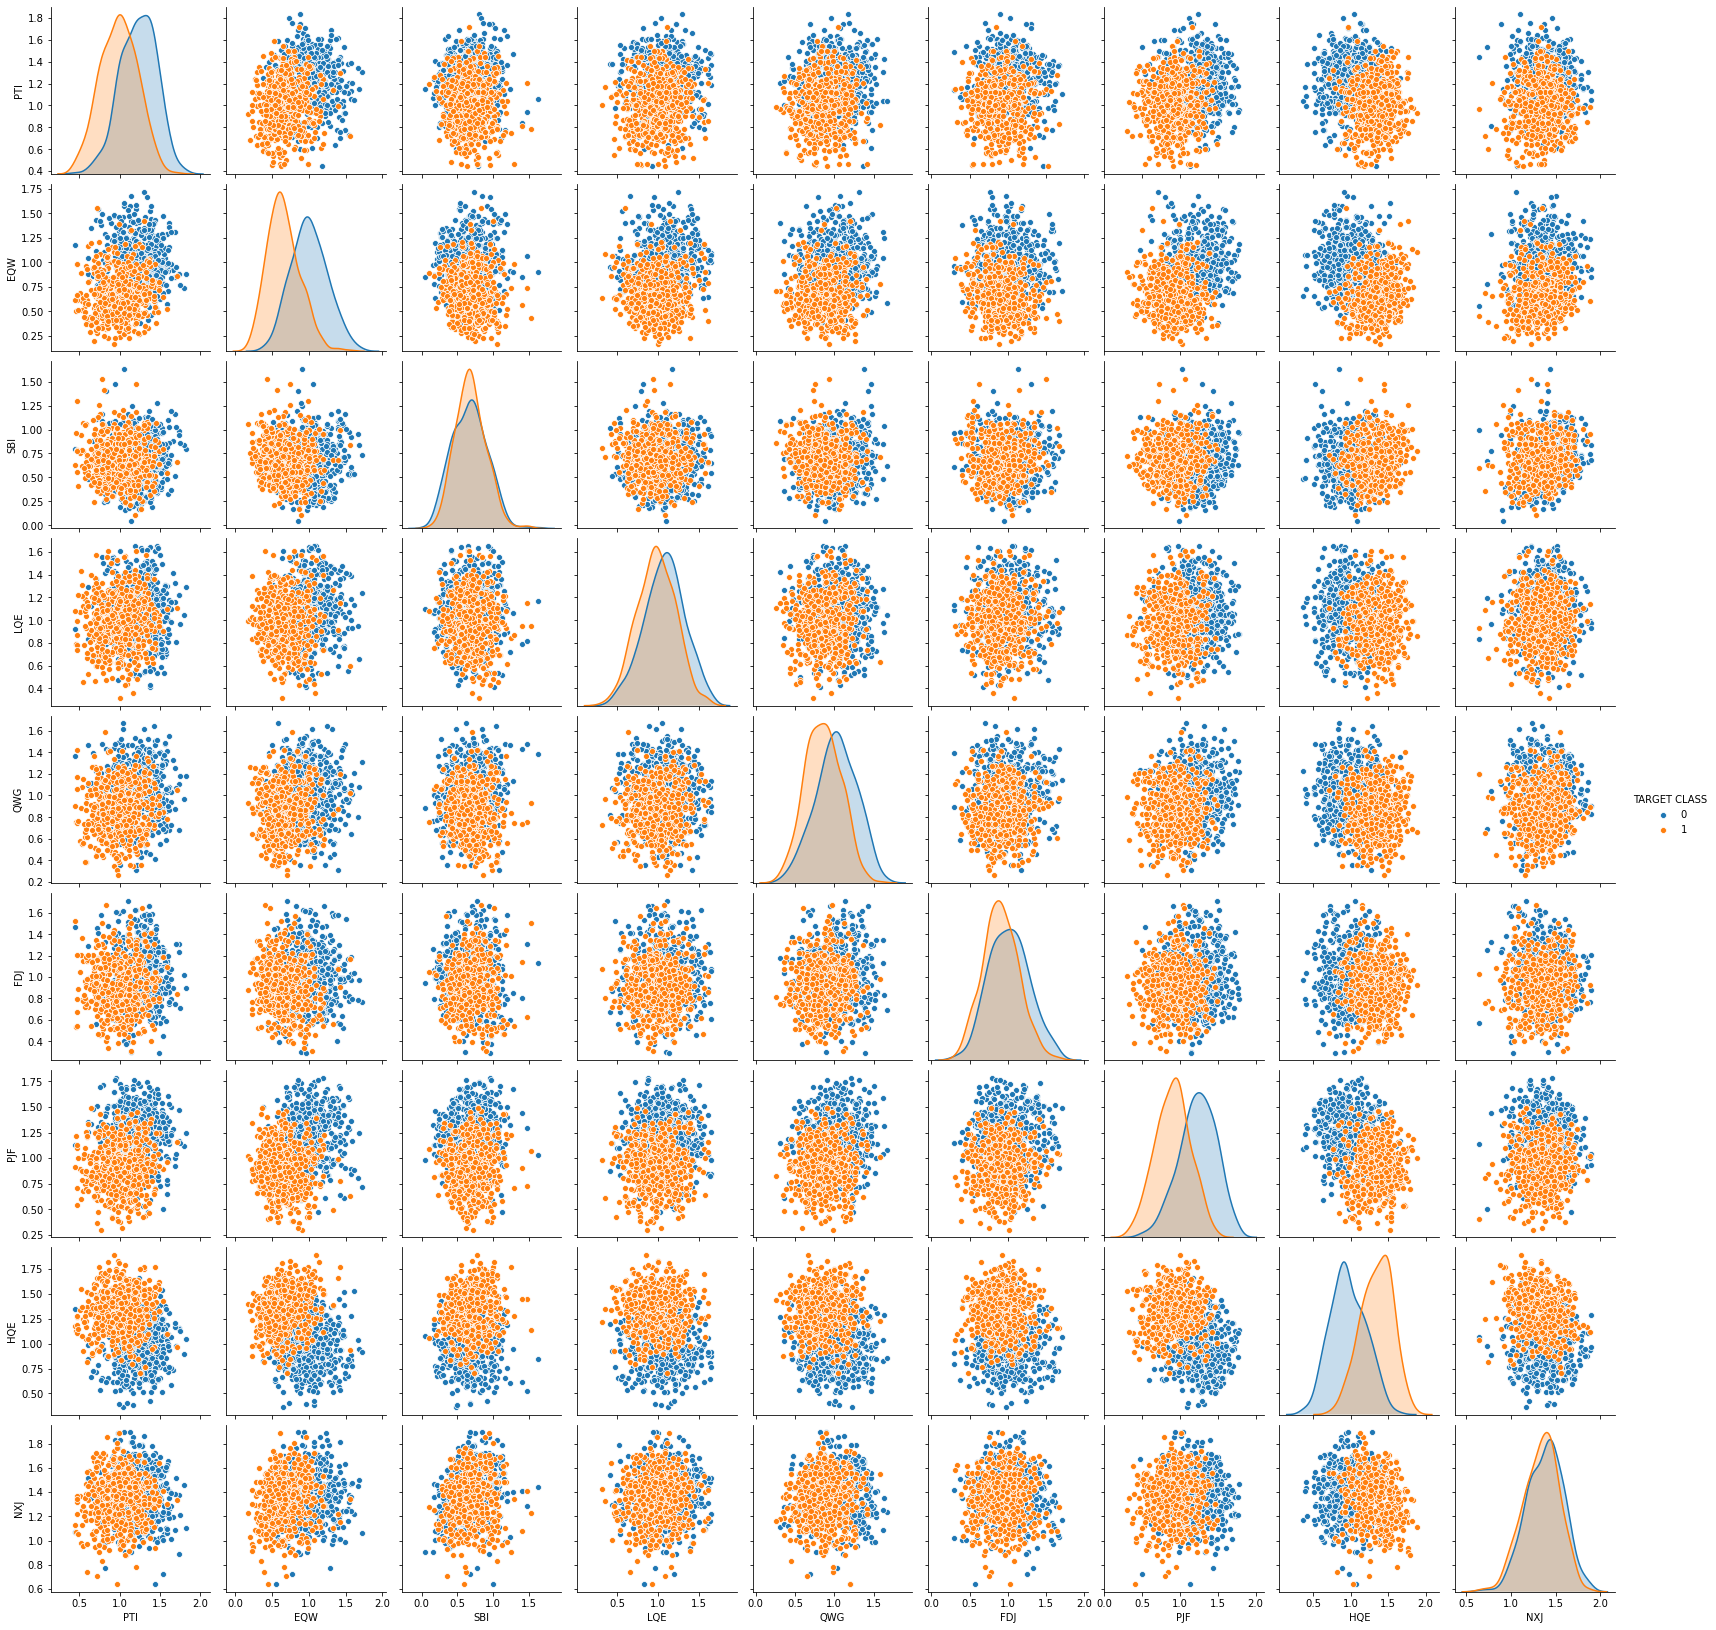

In [9]:
import seaborn as sns
sns.pairplot(df,hue='TARGET CLASS')

## We can do this using Train Test Split and Cross Validation:

### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

### Using KNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

## Predictions and Evaluations
Let's evaluate KNN model

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [17]:
print(confusion_matrix(y_test,pred))

[[117  19]
 [ 22 142]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       136
           1       0.88      0.87      0.87       164

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

We can do this by accuracy rate or by error rate

In [19]:
#Using Accuracy Rate
accuracy_rate = []

# Will take some time
for i in range(1,40): # K value will be from 1 to 40
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())
    
accuracy_rate

[0.883,
 0.882,
 0.908,
 0.907,
 0.9109999999999999,
 0.9189999999999999,
 0.9179999999999999,
 0.9219999999999999,
 0.9250000000000002,
 0.9259999999999999,
 0.9259999999999999,
 0.929,
 0.924,
 0.93,
 0.924,
 0.9280000000000002,
 0.9280000000000002,
 0.932,
 0.929,
 0.9280000000000002,
 0.9230000000000003,
 0.923,
 0.921,
 0.924,
 0.922,
 0.9259999999999999,
 0.923,
 0.9259999999999999,
 0.9280000000000002,
 0.93,
 0.924,
 0.925,
 0.925,
 0.9280000000000002,
 0.93,
 0.93,
 0.9279999999999999,
 0.9339999999999999,
 0.9289999999999999]

In [20]:
#Method 1: To find error rate
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())
    
error_rate

[0.11699999999999999,
 0.118,
 0.09199999999999997,
 0.09299999999999997,
 0.08900000000000008,
 0.08100000000000007,
 0.08200000000000007,
 0.07800000000000007,
 0.07499999999999984,
 0.07400000000000007,
 0.07400000000000007,
 0.07099999999999995,
 0.07599999999999996,
 0.06999999999999995,
 0.07599999999999996,
 0.07199999999999984,
 0.07199999999999984,
 0.06799999999999995,
 0.07099999999999995,
 0.07199999999999984,
 0.07699999999999974,
 0.07699999999999996,
 0.07899999999999996,
 0.07599999999999996,
 0.07799999999999996,
 0.07400000000000007,
 0.07699999999999996,
 0.07400000000000007,
 0.07199999999999984,
 0.06999999999999995,
 0.07599999999999996,
 0.07499999999999996,
 0.07499999999999996,
 0.07199999999999984,
 0.06999999999999995,
 0.06999999999999995,
 0.07200000000000006,
 0.06600000000000006,
 0.07100000000000006]

In [21]:
#Method 2: To find error rate
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

error_rate

[0.13666666666666666,
 0.12,
 0.10333333333333333,
 0.1,
 0.09666666666666666,
 0.07333333333333333,
 0.08666666666666667,
 0.08,
 0.08,
 0.07,
 0.08666666666666667,
 0.07666666666666666,
 0.07666666666666666,
 0.07,
 0.07333333333333333,
 0.06333333333333334,
 0.07,
 0.07333333333333333,
 0.08,
 0.07666666666666666,
 0.08333333333333333,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.08666666666666667,
 0.08333333333333333,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.08666666666666667,
 0.09,
 0.08333333333333333,
 0.09]

Text(0, 0.5, 'Accuracy Rate')

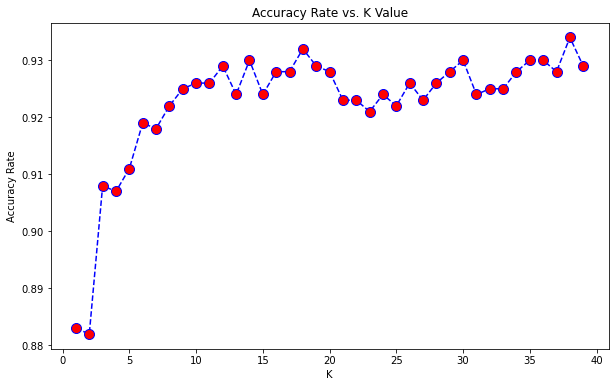

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Here we can see that after around K>23 the accuracy rate just tends to hover around 0.935-and above. Let's retrain the model with that and check the classification report

Text(0, 0.5, 'Error Rate')

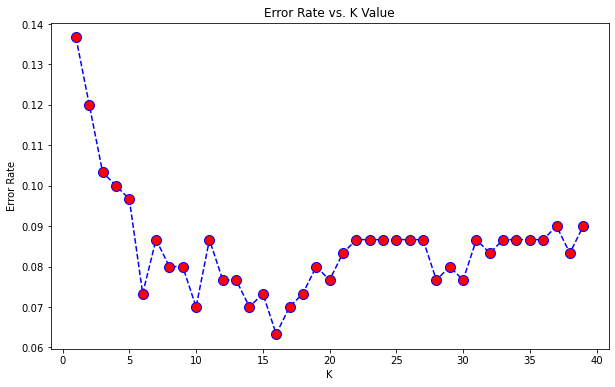

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here also we can see that after around K>23 the error rate just tends to hover around 0.06-0.05. Let's retrain the model with that and check the classification report

In [24]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbors => K Value

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[117  19]
 [ 22 142]]


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       136
           1       0.88      0.87      0.87       164

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [25]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[125  11]
 [ 15 149]]


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       136
           1       0.93      0.91      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



# We can clearly observe that with k = 23 the accuracy has increased